# Which Employees may quit ?

Dataset - https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv



# Loading Employee's data

In [7]:
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df = pd.read_csv(file_name)

In [8]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [9]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [11]:
# Which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [16]:
# Values of categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [17]:
len(hr_df)

14999

In [18]:
len(hr_df.columns)

9

In [19]:
hr_df.shape

(14999, 9)

# Loding Evaluation and Employee's satisfaction data

In [21]:
file = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_eval_satis = pd.read_excel(file)

emp_eval_satis.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [22]:
emp_eval_satis.shape

(14999, 3)

# Joining two tables

In [24]:
joined_df = hr_df.set_index('employee_id').join(emp_eval_satis.set_index('EMPLOYEE #'))
joined_df = joined_df.reset_index()
joined_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


# Is there any missed value ?

In [26]:
joined_df[joined_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [27]:
joined_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Filling missed values

In [28]:
joined_df.fillna(joined_df.mean(), inplace=True)
joined_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [29]:
joined_df[joined_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [30]:
joined_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [31]:
# drop the 'emloyee ID'
joined_df_final = joined_df.drop(columns='employee_id')
joined_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [32]:
joined_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [33]:
joined_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [34]:
joined_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [35]:
joined_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Correlation Matrix

No handles with labels found to put in legend.


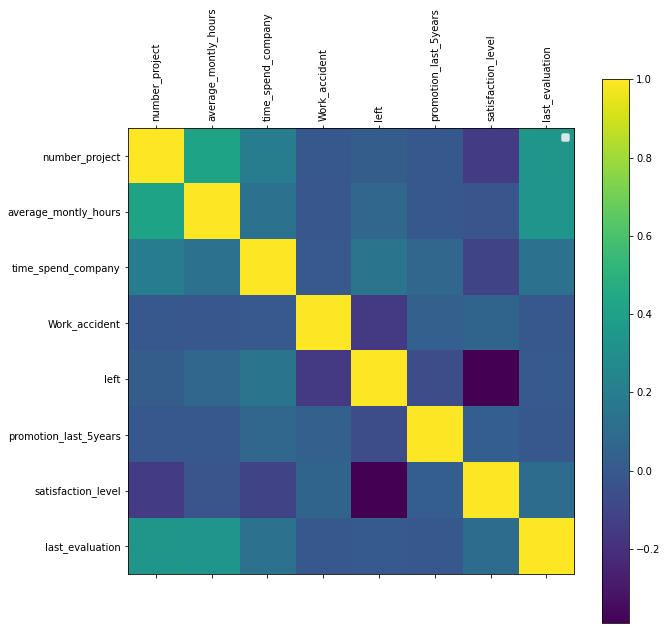

In [37]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(joined_df_final)

# Preparing Dataset for ML (1)

Like one-hot encoding, this technique is an encoding that separates data into a number of zeros and one one.

In [39]:
# One Hot Encoing on Categorical Data

categorical = ['department', 'salary']
joined_df_final = pd.get_dummies(joined_df_final, columns=categorical, drop_first=True)
joined_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [40]:
# Number of columns 
len(joined_df_final.columns)

19

In [41]:
# How many employees have left in the dataset ?
len(joined_df_final.loc[joined_df_final['left'] == 1])

3571

In [42]:
joined_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [43]:
joined_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

# Preparing Dataset for ML (2)

In [46]:
from sklearn.model_selection import train_test_split

# Remove the label values from training data
X = joined_df_final.drop(['left'],axis=1).values
# Assigned those label values to Y dataset
y = joined_df_final['left'].values

In [47]:
# Split it to 70 : 30 ratio (Train : Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.591984,1.891142,0.342297,-0.405886,-0.143902,-2.108818,0.902541,-0.233084,-0.232174,-0.227118,-0.209146,-0.246413,3.957914,-0.623356,-0.416965,-0.471569,1.025958,-0.867952
1,0.971376,0.965834,-0.334242,2.463744,-0.143902,1.157787,1.019381,-0.233084,-0.232174,-0.227118,-0.209146,-0.246413,-0.252658,-0.623356,-0.416965,-0.471569,1.025958,-0.867952
2,-0.649231,-0.402013,-1.010781,-0.405886,-0.143902,1.520743,-0.324278,-0.233084,-0.232174,-0.227118,-0.209146,-0.246413,-0.252658,-0.623356,-0.416965,-0.471569,-0.974698,1.152138
3,-0.649231,1.207218,-0.334242,-0.405886,-0.143902,0.391546,1.136220,-0.233084,-0.232174,-0.227118,-0.209146,-0.246413,-0.252658,1.604219,-0.416965,-0.471569,1.025958,-0.867952
4,0.161073,0.744565,-1.010781,-0.405886,-0.143902,0.472203,0.727281,-0.233084,-0.232174,-0.227118,-0.209146,-0.246413,3.957914,-0.623356,-0.416965,-0.471569,-0.974698,1.152138


In [50]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-5.882733e-16,-2.593199e-16,2.220658e-17,1.921398e-17,-6.260139e-18,3.192796e-14,3.021629e-14,-3.545438e-16,-1.071943e-15,-8.793645e-16,1.023467e-15,-8.187829e-16,-1.018203e-15,-1.969195e-16,-1.169874e-15,2.774024e-16,9.362715e-17,2.932960e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.459534e+00,-2.111821e+00,-1.010781e+00,-4.058864e-01,-1.439019e-01,-2.108818e+00,-2.076877e+00,-2.330841e-01,-2.321742e-01,-2.271179e-01,-2.091457e-01,-2.464129e-01,-2.526584e-01,-6.233562e-01,-4.169647e-01,-4.715691e-01,-9.746985e-01,-8.679516e-01
25%,-6.492308e-01,-9.048975e-01,-3.342419e-01,-4.058864e-01,-1.439019e-01,-6.973220e-01,-9.084780e-01,-2.330841e-01,-2.321742e-01,-2.271179e-01,-2.091457e-01,-2.464129e-01,-2.526584e-01,-6.233562e-01,-4.169647e-01,-4.715691e-01,-9.746985e-01,-8.679516e-01
50%,1.610728e-01,-1.982034e-02,-3.342419e-01,-4.058864e-01,-1.439019e-01,1.092469e-01,2.624127e-02,-2.330841e-01,-2.321742e-01,-2.271179e-01,-2.091457e-01,-2.464129e-01,-2.526584e-01,-6.233562e-01,-4.169647e-01,-4.715691e-01,-9.746985e-01,-8.679516e-01
75%,9.713764e-01,8.853722e-01,3.422967e-01,-4.058864e-01,-1.439019e-01,8.351590e-01,9.025406e-01,-2.330841e-01,-2.321742e-01,-2.271179e-01,-2.091457e-01,-2.464129e-01,-2.526584e-01,1.604219e+00,-4.169647e-01,-4.715691e-01,1.025958e+00,1.152138e+00
max,2.591984e+00,2.192873e+00,4.401529e+00,2.463744e+00,6.949178e+00,1.561071e+00,1.662000e+00,4.290298e+00,4.307112e+00,4.403000e+00,4.781356e+00,4.058228e+00,3.957914e+00,1.604219e+00,2.398284e+00,2.120580e+00,1.025958e+00,1.152138e+00


# Train a Logistic Regression Model

Logistic Regression is a supervised learning algorithm that uses regression to predict the probability that data belongs to a certain category as a value between 0 and 1 and classifies it as belonging to a category with a higher probability according to the probability.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [55]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("Accuracy {0: .2f}%".format(100*accuracy_score(prediction, y_test)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy  78.47%
[[3148  265]
 [ 704  383]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3413
           1       0.59      0.35      0.44      1087

    accuracy                           0.78      4500
   macro avg       0.70      0.64      0.65      4500
weighted avg       0.76      0.78      0.76      4500



# Test the model with a single new row of data

In [56]:
input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

In [57]:
# convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into my model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test smaple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# Print probablities of belonging to either class
model.predict_proba(input_data)

array([[0.92558114, 0.07441886]])

# Try to use a Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [61]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.89%
[[3402   11]
 [  39 1048]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3413
           1       0.99      0.96      0.98      1087

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [62]:
joined_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [63]:
joined_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [65]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.320101
2,0.187813
0,0.176176
1,0.148015
6,0.124497
3,0.009790
16,0.007456
17,0.004165
15,0.003909
13,0.003683


# Can Deep Learning make a difference ?

In [70]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [71]:
# Display Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Traning Classifier
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.5289 - accuracy: 0.7750 - val_loss: 0.2982 - val_accuracy: 0.8871
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2632 - accuracy: 0.9068 - val_loss: 0.2066 - val_accuracy: 0.9373
Epoch 3/25
1050/1050 [==============================] - 1s 925us/step - loss: 0.1992 - accuracy: 0.9413 - val_loss: 0.1803 - val_accuracy: 0.9436
Epoch 4/25
1050/1050 [==============================] - 1s 855us/step - loss: 0.1691 - accuracy: 0.9503 - val_loss: 0.1704 - val_accuracy: 0.9478
Epoch 5/25
1050/1050 [==============================] - 1s 911us/step - loss: 0.1674 - accuracy: 0.9475 - val_loss: 0.1689 - val_accuracy: 0.9476
Epoch 6/25
1050/1050 [==============================] - 1s 893us/step - loss: 0.1626 - accuracy: 0.9508 - val_loss: 0.1657 - val_accuracy: 0.9504
Epoch 7/25
1050/1050 [==============================] - 1s 871us/step - loss: 0.1673 - accuracy: 0.9527 - val_loss: 0.1630 - val

# Visualization

In [73]:
# Plotting loss charts
import matplotlib.pyplot as plt

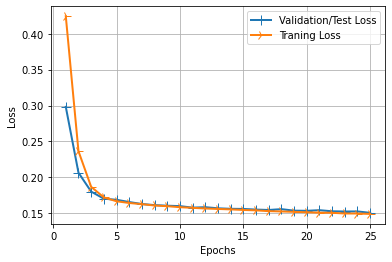

In [74]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Traning Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

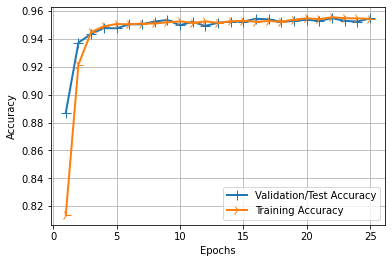

In [76]:
# Plotting accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [77]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3312  101]
 [ 103  984]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3413
           1       0.91      0.91      0.91      1087

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500

